 Goal of the Dataset:

The goal of this dataset is to predict housing prices based on multiple features such as the number of bedrooms, lot size, number of bathrooms, and other related characteristics.
This dataset helps in building regression models that estimate the selling price of a house given various attributes.

 Dataset Source:

This dataset was obtained from Kaggle, a popular platform for datasets and machine learning challenges.

Link to the dataset: [Housing Prices Dataset on Kaggle](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

In [6]:
import piplite
await piplite.install('seaborn')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.datasets import load_Housing

Housing = pd.read_csv('Housing.csv')

Housing.head()

<ipython-input-4-7a4b15c80f3b>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
Housing.shape[1]

13

In [29]:
Housing.shape[0]

545

In [30]:
# Get the number of rows and columns
Housing.shape

(545, 13)

In [31]:
# Display the column names
Housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [32]:
# Column names and types
Housing.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [33]:
Housing['Class_Label'] = Housing['price'].apply(lambda x: 'Expensive' if x >= 500000 else 'Affordable')

print(Housing.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

  Class_Label  
0   Expensive  
1   Expensive  
2   Expensive  
3   Expensive  
4   Expensiv

In [34]:
# Display basic statistics about the target variable
target_variable_stats = Housing['price'].describe()
target_variable_range = Housing['price'].min(), Housing['price'].max()

target_variable_stats, target_variable_range

(count    5.450000e+02
 mean     4.766729e+06
 std      1.870440e+06
 min      1.750000e+06
 25%      3.430000e+06
 50%      4.340000e+06
 75%      5.740000e+06
 max      1.330000e+07
 Name: price, dtype: float64,
 (1750000, 13300000))

In [45]:
# Target Variable

# In this dataset, the target variable is `price`, which represents the selling price of the houses. This is a continuous numerical variable used for regression analysis.

#  Target Variable Details:
# - Name: `price`
# - Type: Numerical (Continuous)
# - Range: From 1,750,000 to 13,300,000
# - Statistics:
# - Mean: 4,766,729
# - Standard Deviation: 1,870,440
# - Median: 4,340,000
# - Minimum Value: 1,750,000
# - 25th Percentile: 3,430,000
# - 75th Percentile: 5,740,000
# - Maximum Value: 13,300,000

In [54]:
Raw_samples = Housing.head()
# Display the raw samples
print("Raw Samples:\n", Raw_samples)

Raw Samples:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

  Class_Label  
0   Expensive  
1   Expensive  
2   Expensive  
3   Expensive 

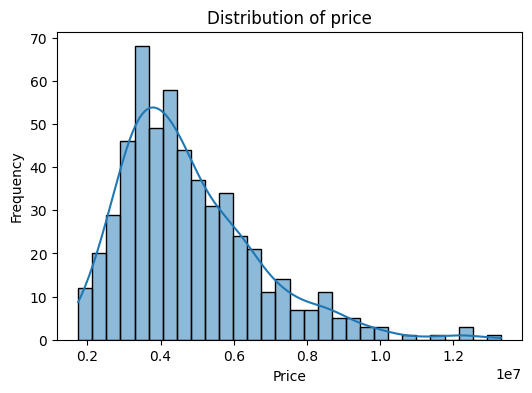

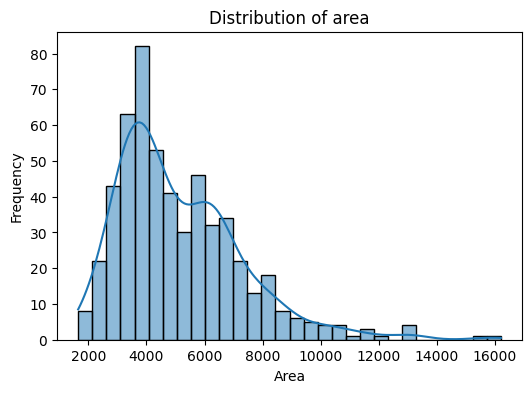

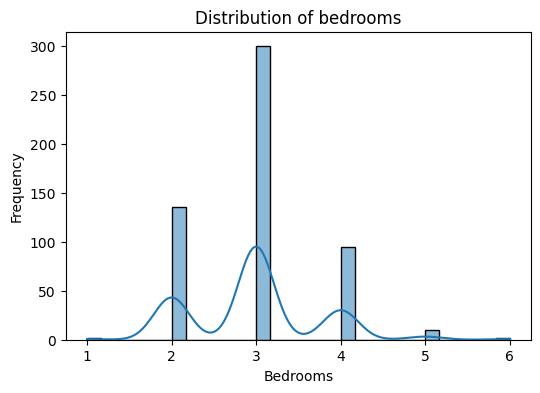

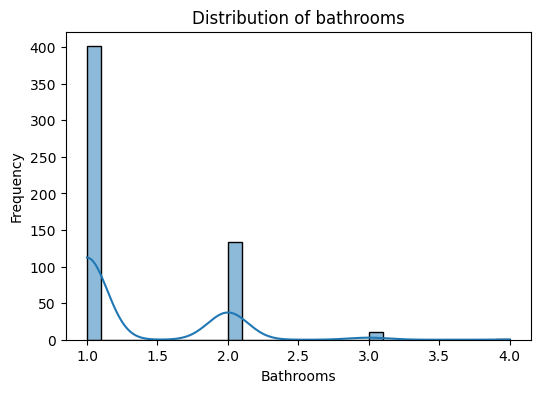

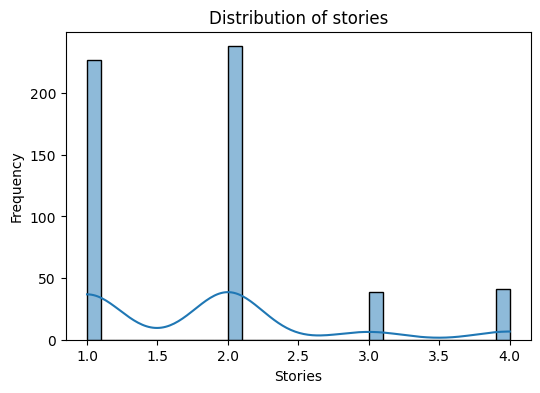

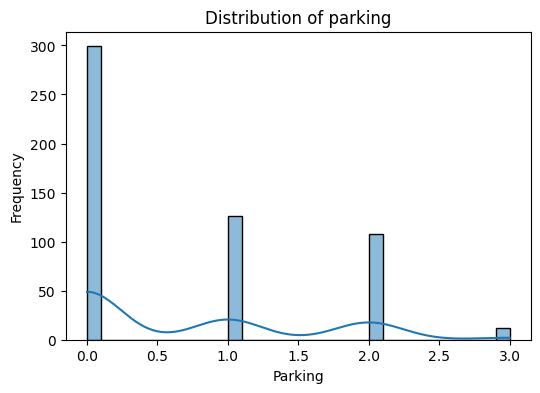

In [59]:
# Create a Histogram
# List of numerical columns 
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(Housing[col], bins=30, kde=True)
    #adds a title to the histogram
    plt.title(f'Distribution of {col}') 
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')
    # display the histogram
    plt.show()

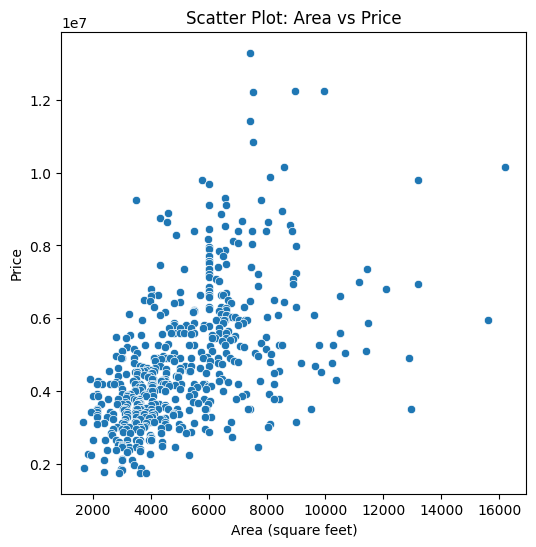

In [60]:
# Create a scatter plot of area vs price
plt.figure(figsize=(6, 6))
sns.scatterplot(x=Housing['area'], y=Housing['price'])
plt.title('Scatter Plot: Area vs Price')
plt.xlabel('Area (square feet)')
plt.ylabel('Price')
plt.show()

In [62]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

descriptive_stats = Housing[numerical_columns].describe()

descriptive_stats.loc['variance'] = Housing[numerical_columns].var()

# Display the table
descriptive_stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5.150541e+03,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2.170141e+03,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1.650000e+03,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3.600000e+03,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4.600000e+03,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6.360000e+03,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,1.620000e+04,6.000000,4.000000,4.000000,3.000000
variance,3.498544e+12,4.709512e+06,0.544738,0.252476,0.752543,0.742330


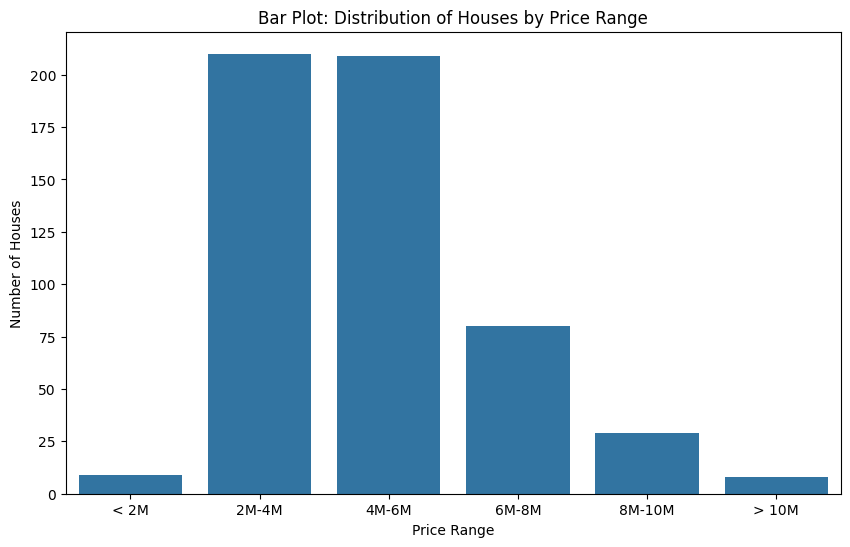

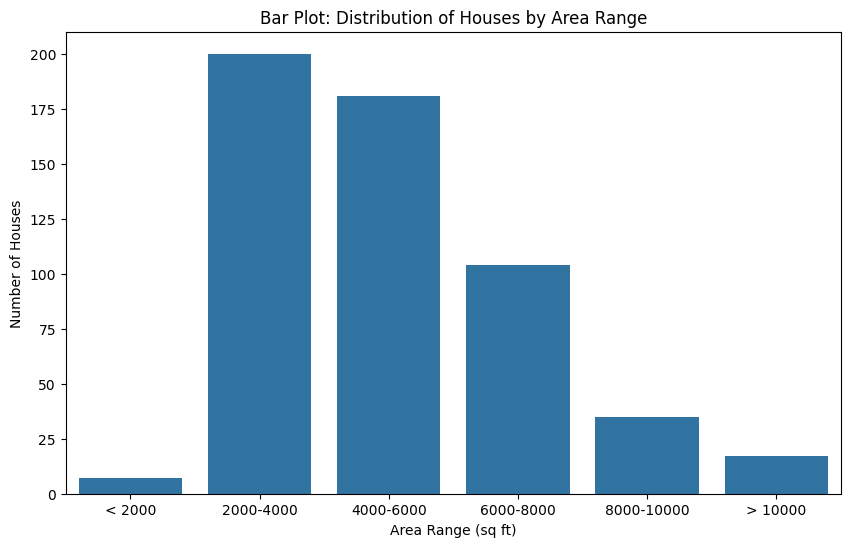

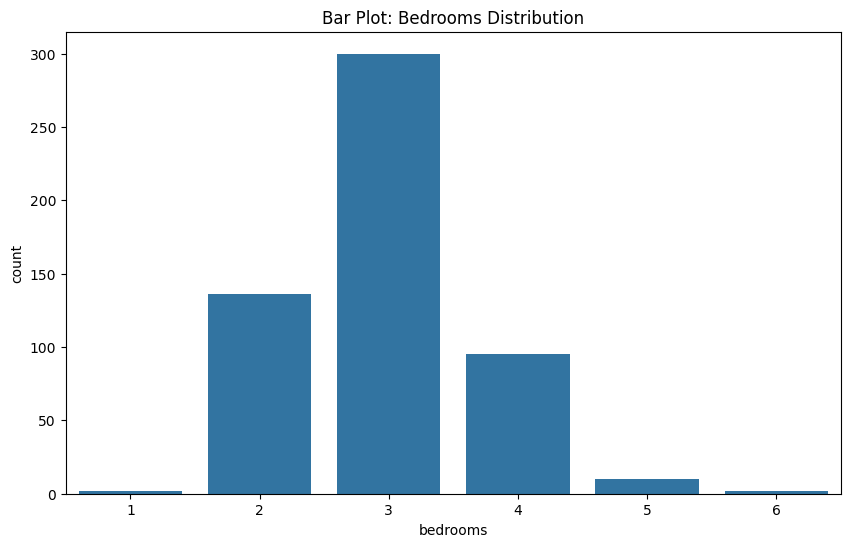

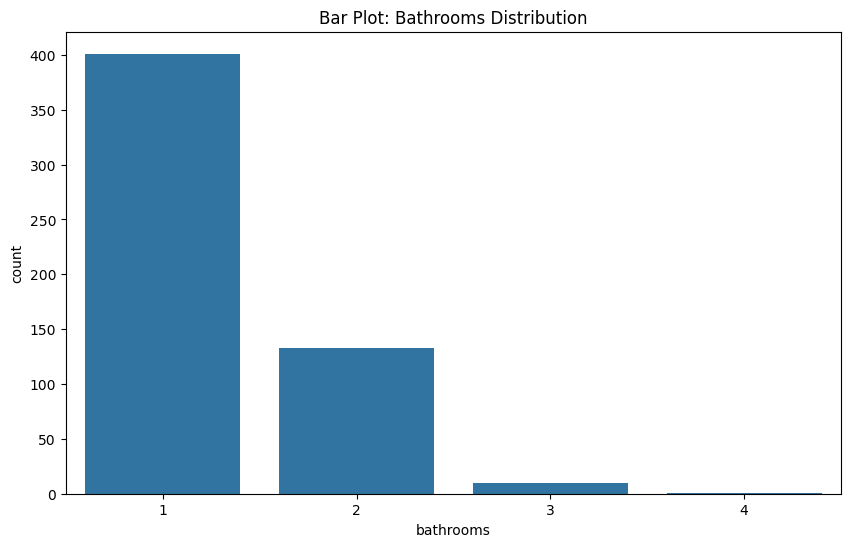

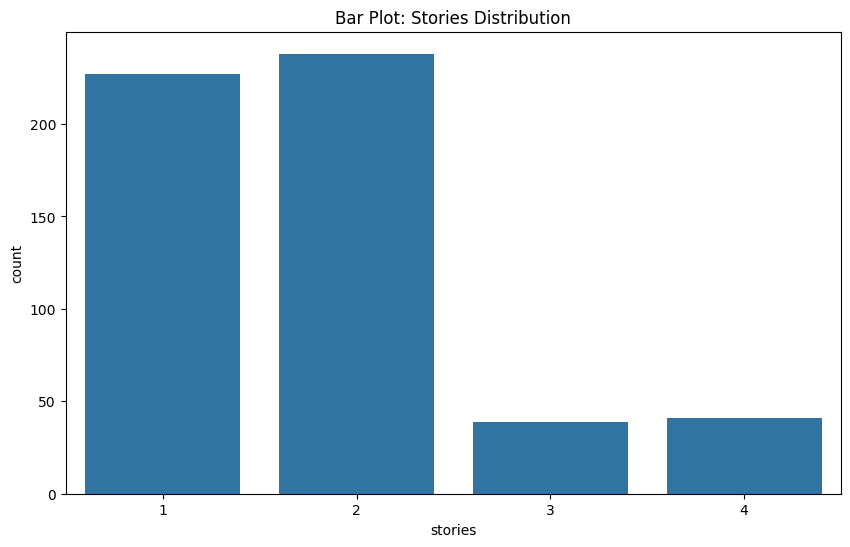

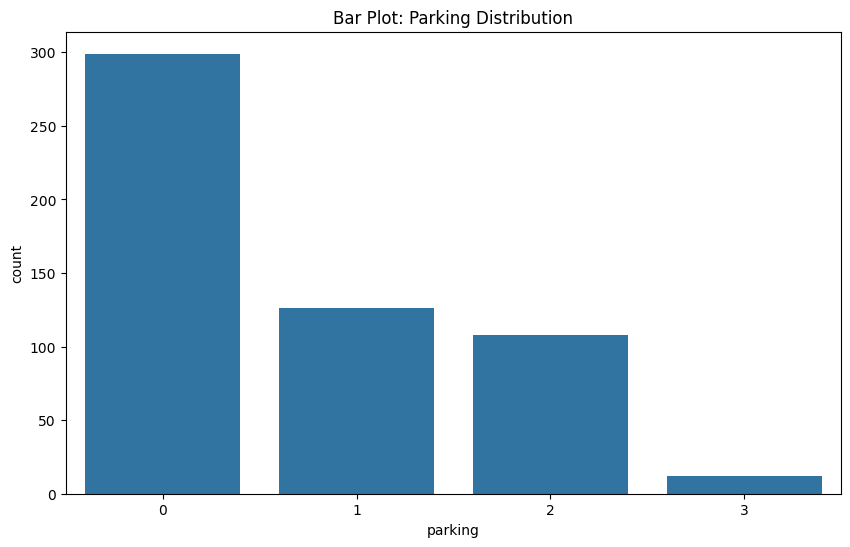

In [13]:
#Bar plots

# Define price ranges
price_bins = [0, 2000000, 4000000, 6000000, 8000000, 10000000, 14000000]

# Assign names to each bin
price_labels = ['< 2M', '2M-4M', '4M-6M', '6M-8M', '8M-10M', '> 10M']


#Bar Plot: Distribution of houses in different price ranges (initializes a new figure for the plot)
plt.figure(figsize=(10, 6))

#e creates the bar plot using Seaborn's countplot() function
sns.countplot(x=pd.cut(Housing['price'], bins=price_bins, labels=price_labels))

#Creating the bar plot
plt.title("Bar Plot: Distribution of Houses by Price Range")

#Labeling the axes clearly to eliminate any ambiguity in understanding the data represented in the plot.
plt.xlabel("Price Range")
plt.ylabel("Number of Houses")

#display the plot
plt.show()

#-------------------------------------------------------------------------


#Bar Plot: area Distribution

# Define area ranges (bins)
area_bins = [0, 2000, 4000, 6000, 8000, 10000, 16000]
# Assign names to each bin
area_labels = ['< 2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000', '> 10000']

# Directly bin 'area' and pass the binned data to the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=pd.cut(Housing['area'], bins=area_bins, labels=area_labels))
plt.title("Bar Plot: Distribution of Houses by Area Range")
plt.xlabel("Area Range (sq ft)")
plt.ylabel("Number of Houses")
plt.show()

#---------------------------------------------------------------

#Bar Plot: bedrooms Distribution

#Setting the size of the figure
plt.figure(figsize=(10, 6))

#Creating the bar plot
sns.countplot(x="bedrooms", data=Housing)

#Adding a title to the plot
plt.title("Bar Plot: Bedrooms Distribution")

#display the plot
plt.show()

#---------------------------------------------------------------
#Bar Plot: bathrooms Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x="bathrooms", data=Housing)
plt.title("Bar Plot: Bathrooms Distribution")
plt.show()
#---------------------------------------------------------------

#Bar Plot: stories Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="stories", data=Housing)
plt.title("Bar Plot: Stories Distribution")
plt.show()

#--------------------------------------------------------------

#Bar Plot: parking Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="parking", data=Housing)
plt.title("Bar Plot: Parking Distribution")
plt.show()




Missing values in each column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Total number of missing values in the dataset: 0


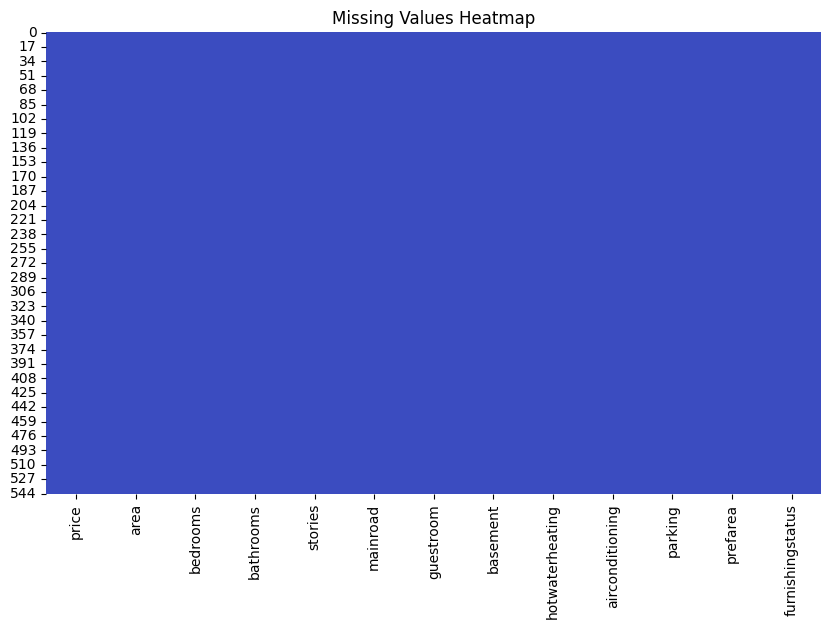

In [5]:
#check for missing values in the entire dataset
missing_values = Housing.isnull().sum()

#display the result
print("Missing values in each column:")
print(missing_values)

#total number of missing value
print("\nTotal number of missing values in the dataset:",missing_values.sum())

#Setting up the figure size
plt.figure(figsize=(10, 6))

#Creating the heatmap for missing values, using blue for non-missing values and red for missing values.
sns.heatmap(Housing.isnull(), cmap='coolwarm', cbar=False)

#Adding a title to the heatmap
plt.title("Missing Values Heatmap")

#Displaying the plot
plt.show()

#Since our dataset doesn’t have any missing values, we don’t need to handle missing data or drop any rows or columns.

In [5]:
#printing the data types for the dataset
print(Housing.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [115]:
#detecting outliers using standard deviation
import numpy as np

numerical_columns = ["price", "area", "bedrooms", "stories", "parking"]

#calculate the standard deviation
for column in numerical_columns:
    data = Housing[column]
    mean = np.mean(data)
    std_dev = np.std(data)
    threshold = 2 
    outliers = [value for value in data if abs(value - mean) > threshold * std_dev]
    
    #count the number of outliers in each column
    outlier_count = len(outliers)

     #print the outliers
    print(f"\nOutliers for {column}: {outliers} ,\nnumbers of outliers: {outlier_count} ")


Outliers for price: [13300000, 12250000, 12250000, 12215000, 11410000, 10850000, 10150000, 10150000, 9870000, 9800000, 9800000, 9681000, 9310000, 9240000, 9240000, 9100000, 9100000, 8960000, 8890000, 8855000, 8750000, 8680000, 8645000, 8645000, 8575000, 8540000] ,
numbers of outliers: 26 

Outliers for area: [9960, 16200, 13200, 11440, 11175, 13200, 12090, 10500, 9620, 15600, 11460, 10500, 10500, 10269, 9800, 11410, 10700, 12900, 10240, 9667, 9860, 10360, 9500, 12944] ,
numbers of outliers: 24 

Outliers for bedrooms: [5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 1, 1, 5] ,
numbers of outliers: 14 

Outliers for stories: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4] ,
numbers of outliers: 41 

Outliers for parking: [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3] ,
numbers of outliers: 12 


In [12]:
#Detect the outlier using z-scores
from scipy.stats import zscore 
import numpy as np

numerical_columns = ["price", "area", "bedrooms", "stories", "parking"]
#calculate the z-scores
for column in numerical_columns:
    data =Housing [column]
    z_scores = zscore(data)
    threshold = 2
    outliers = data[np.abs(z_scores) > threshold]
    
    #count the number of outliers in each column
    outlier_count = len(outliers) 
    
    #print the outliers
    print(f"\nOutliers for {column}: \n{outliers} ,\nnumbers of outliers: {outlier_count} ")



Outliers for price: 
0     13300000
1     12250000
2     12250000
3     12215000
4     11410000
5     10850000
6     10150000
7     10150000
8      9870000
9      9800000
10     9800000
11     9681000
12     9310000
13     9240000
14     9240000
15     9100000
16     9100000
17     8960000
18     8890000
19     8855000
20     8750000
21     8680000
22     8645000
23     8645000
24     8575000
25     8540000
Name: price, dtype: int64 ,
numbers of outliers: 26 

Outliers for area: 
2       9960
7      16200
10     13200
56     11440
64     11175
66     13200
69     12090
82     10500
113     9620
125    15600
129    11460
142    10500
146    10500
171    10269
175     9800
186    11410
191    10700
211    12900
224    10240
229     9667
252     9860
277    10360
401     9500
403    12944
Name: area, dtype: int64 ,
numbers of outliers: 24 

Outliers for bedrooms: 
7      5
28     5
34     5
89     5
112    6
143    5
152    5
271    5
340    5
356    5
395    6
445    1
528    1
536    5

In [45]:
#Removing the "price" outlier
price_column = Housing['price']

mean_p = price_column.mean()

diff_p = abs(price_column - mean_p)

max_diff_index = diff_p.idxmax()

housing_no_outlier = Housing.drop(max_diff_index)

print("original frame:")
print(Housing)

print("\ndata after removing outlier")
print(housing_no_outlier)

original frame:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwate

In [8]:
#Removing the "area" outlier
area_column = Housing['area']

mean_a = area_column.mean()

diff_a = abs(area_column  - mean_a)

max_diff_index = diff_a.idxmax()

housing_no_outlier = Housing.drop(max_diff_index)

print("original frame:")
print(Housing)

print("\ndata after removing outlier")
print(housing_no_outlier)


original frame:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwate

In [7]:
# Removing the"bedrooms" outlier
bedrooms_column = Housing['bedrooms']

mean_b = bedrooms_column.mean()

diff_b = abs(bedrooms_column  - mean_b)

max_diff_index = diff_b.idxmax()

housing_no_outlier = Housing.drop(max_diff_index)

print("original frame:")
print(Housing)

print("\ndata after removing outlier")
print(housing_no_outlier)

original frame:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwate

In [9]:
# Removing the "stories" outlier
stories_column = Housing['stories']

mean_s = stories_column.mean()

diff_s= abs(stories_column  - mean_s)

max_diff_index = diff_s.idxmax()

housing_no_outlier = Housing.drop(max_diff_index)

print("original frame:")
print(Housing)

print("\ndata after removing outlier")
print(housing_no_outlier)

original frame:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwate

In [10]:
#Removing the "parking" outlier 
parking_column = Housing['parking']

mean_k = parking_column.mean()

diff_k= abs(parking_column  - mean_k)

max_diff_index = diff_k.idxmax()

housing_no_outlier = Housing.drop(max_diff_index)

print("original frame:")
print(Housing)

print("\ndata after removing outlier")
print(housing_no_outlier)

original frame:
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwate

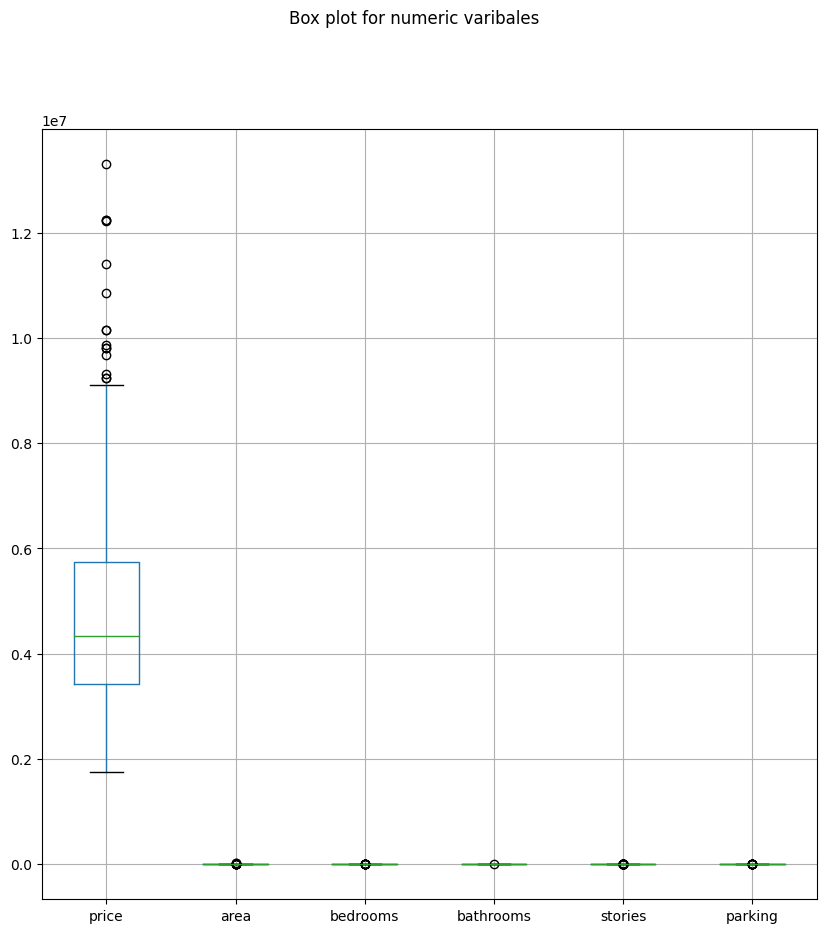

In [14]:
#boxplot for the dataframe before removing outliers

Housing.boxplot(figsize=(10,10))
plt.suptitle('Box plot for numeric varibales ' , y=1)
plt.show()

In [106]:
#desciptive stats
Housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [102]:
#shape of the dataframe before cleaning 
Housing.shape

(545, 13)

In [107]:
#define a function called "plot_boxplot" to show the boxplots for the data

def plot_boxplot(df , ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

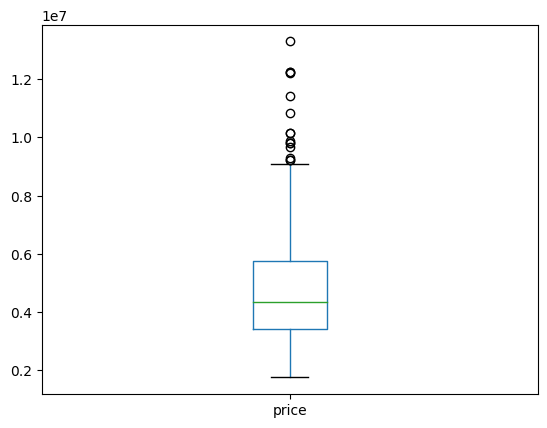

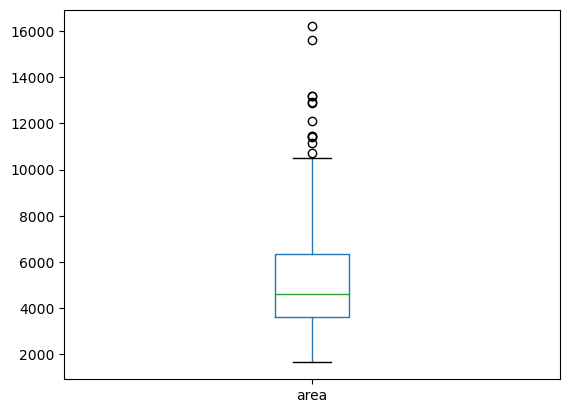

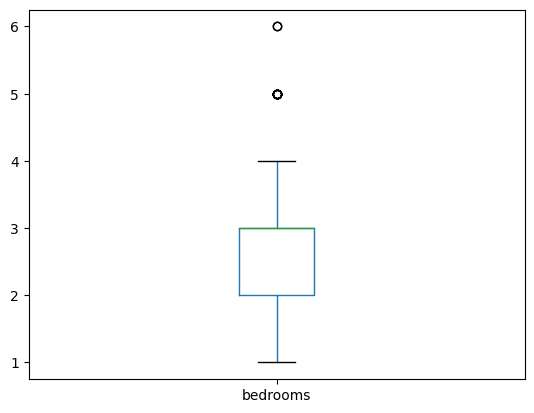

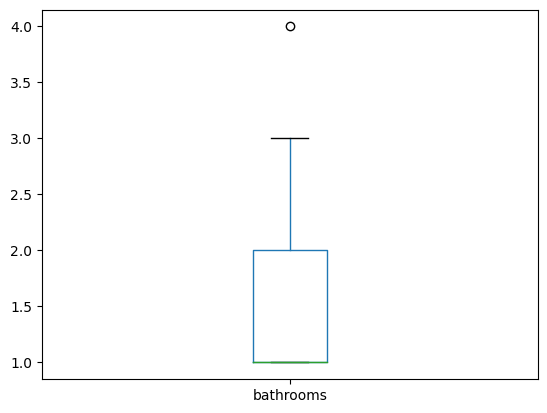

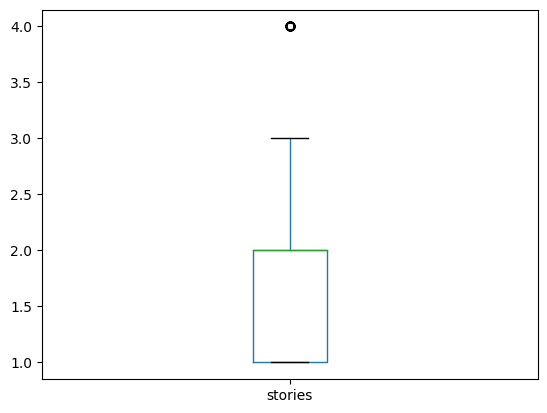

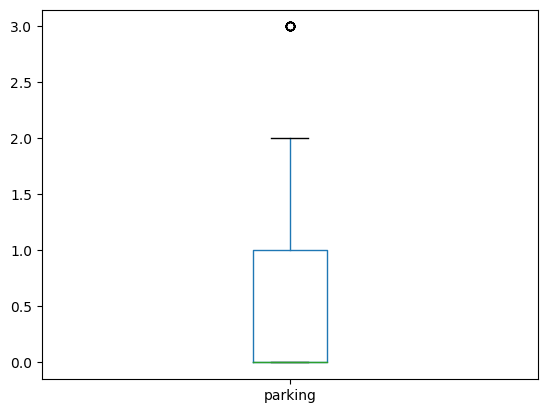

In [105]:
#show the boxplot for each numeric column

plot_boxplot(Housing , "price")
plot_boxplot(Housing , "area")
plot_boxplot(Housing , "bedrooms")
plot_boxplot(Housing , "bathrooms")
plot_boxplot(Housing , "stories")
plot_boxplot(Housing , "parking")

In [81]:
#define a function called "find_outliers" which returns a list for the outliers indexs

def find_outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls


In [82]:
# Create an empty list to store the output indices from multiple columns
index_list = []
for feature in ['price', 'area', 'bedrooms','bathrooms', 'stories', 'parking']:
    index_list.append(find_outliers(Housing, feature))

In [66]:
#calling the list with the outliers index
index_list

[Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64'),
 Index([7, 10, 56, 64, 66, 69, 125, 129, 186, 191, 211, 403], dtype='int64'),
 Index([7, 28, 34, 89, 112, 143, 152, 271, 340, 356, 395, 536], dtype='int64'),
 Index([1], dtype='int64'),
 Index([  1,   6,   9,  17,  26,  30,  31,  35,  37,  38,  39,  41,  42,  43,
         44,  46,  47,  50,  51,  52,  53,  57,  58,  59,  71,  72,  73,  83,
         92,  94, 102, 105, 124, 131, 135, 140, 145, 160, 220, 226, 247],
       dtype='int64'),
 Index([1, 3, 47, 93, 225, 247, 299, 304, 323, 331, 401, 472], dtype='int64')]

In [98]:
# define a function called "remove_outlier" which returns a cleaned dataframe without outliers 

def remove_outlier(df, ls):
    # Flatten the list if it contains Index objects
    if isinstance(ls, list):
        ls = [item for sublist in ls for item in (sublist if isinstance(sublist, pd.Index) else [sublist])]
    
    # Sort and remove duplicates
    ls = sorted(set(ls))
    
    # Check for missing indices
    missing_indices = [i for i in ls if i not in df.index]
    if missing_indices:
        print(f"These indices are missing: {missing_indices}")
    
    # Drop the indices, ignoring errors if any index is not found
    df = df.drop(ls, errors='ignore')
    
    return df


In [110]:
Housing_cleaned = remove_outlier(Housing , index_list)

In [111]:
#the dataframe shape after cleaning
Housing_cleaned .shape

#as shown the rows decresed from 545 to 463 after cleaning the outliers

(463, 13)

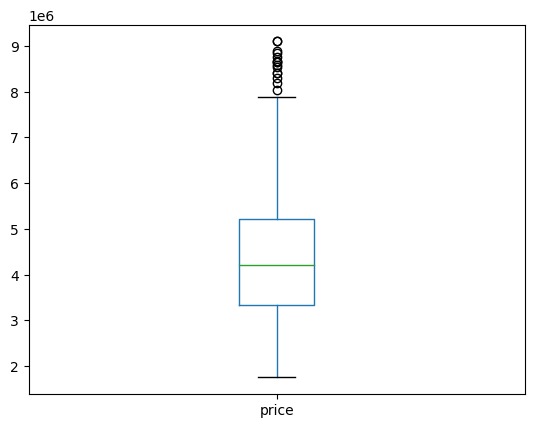

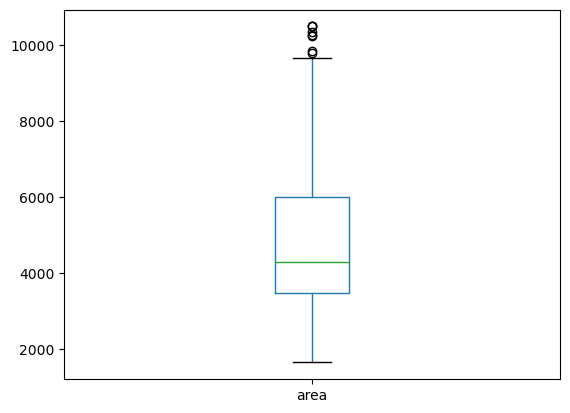

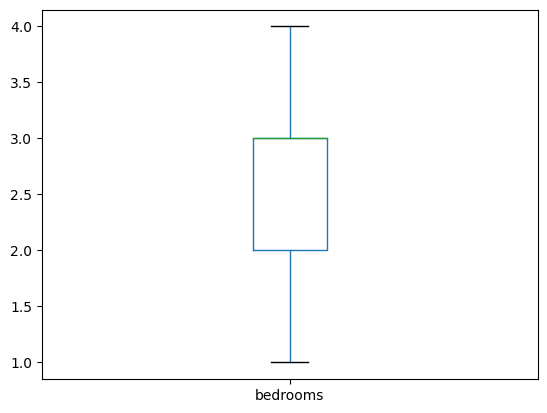

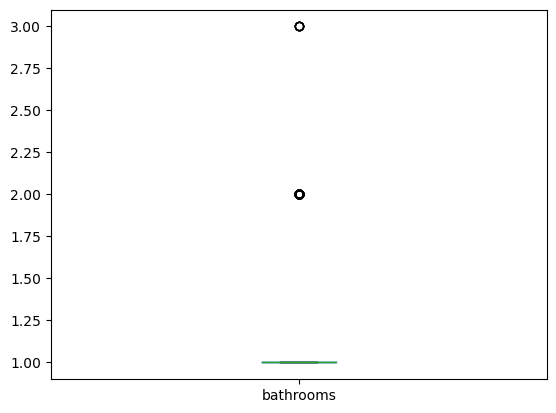

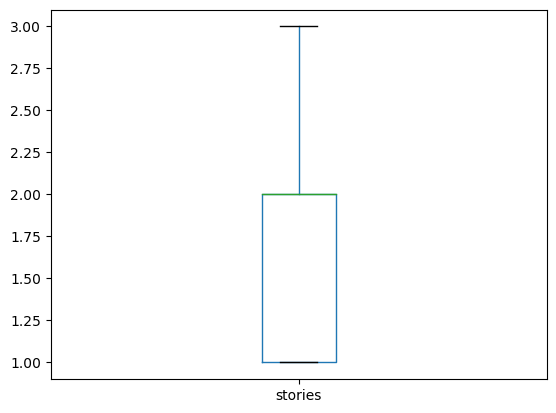

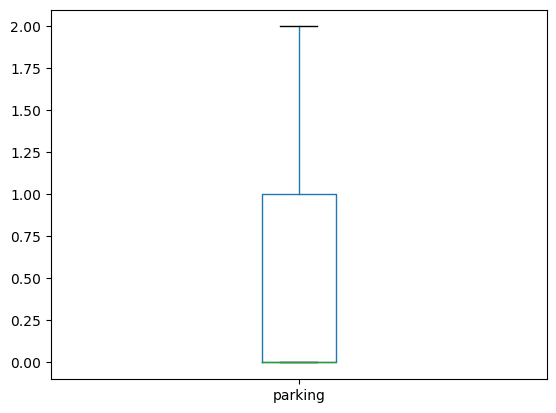

In [112]:
#showing the boxplots after cleaning 

plot_boxplot(Housing_cleaned , "price")
plot_boxplot(Housing_cleaned  , "area")
plot_boxplot(Housing_cleaned  , "bedrooms")
plot_boxplot(Housing_cleaned  , "bathrooms")
plot_boxplot(Housing_cleaned  , "stories")
plot_boxplot(Housing_cleaned  , "parking")

In [ ]:
#Housing_cleaned.to_cvs('Housing_cleaned.cvs' , index=False)

In [12]:
#Encoding the dataset

from sklearn.preprocessing import LabelEncoder 
from scipy import stats 

le=LabelEncoder()
Housing['mainroad'] =le.fit_transform(Housing['mainroad'])
Housing['guestroom'] =le.fit_transform(Housing['guestroom'])
Housing['basement'] =le.fit_transform(Housing['basement'])
Housing['hotwaterheating'] =le.fit_transform(Housing['hotwaterheating'])
Housing['airconditioning'] =le.fit_transform(Housing['airconditioning'])
Housing['prefarea'] =le.fit_transform(Housing['prefarea'])
Housing['furnishingstatus'] =le.fit_transform(Housing['furnishingstatus'])

print(Housing)

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           